In [1]:
import numpy as np 
from numpy import pi
import matplotlib.pyplot as plt
import sciann as sn 
from utils import * 

2023-08-26 11:41:48.231599: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-26 11:41:48.331871: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-08-26 11:41:48.331885: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-08-26 11:41:48.885904: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

---------------------- SCIANN 0.7.0.1 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://www.sciencedirect.com/science/article/pii/S0045782520307374", 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 

 Need support or would like to contribute, please join sciann`s slack group: 
 +  "https://join.slack.com/t/sciann/shared_invite/zt-ne1f5jlx-k_dY8RGo3ZreDXwz0f~CeA" 
 
TensorFlow Version: 2.11.0 
Python Version: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0] 



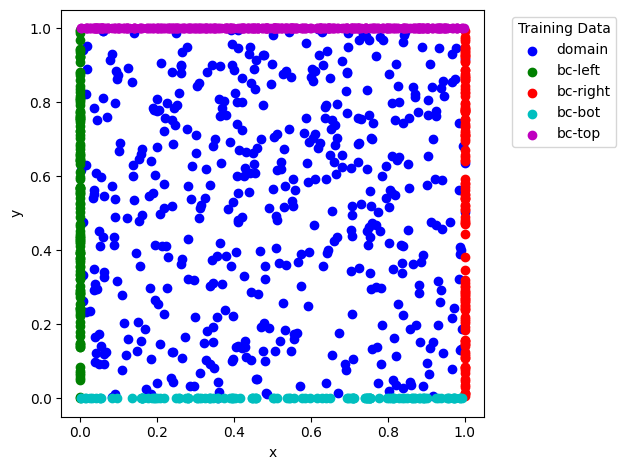

In [2]:
dg = DataGeneratorXY([0.,1.], [0.,1.], num_sample=1000)
dg.plot_data()

In [3]:
x = sn.Variable('x')
y = sn.Variable('y')
T = sn.Functional('T', [x,y], 4*[40], 'tanh', res_net=True)

In [4]:
L1 = sn.diff(T, x, order=2) + sn.diff(T, y, order=2)
BC_top1 = (y==1.)*(x<0.5)*sn.abs(T - 2*x)
BC_top2 = (y==1.)*(x>=0.5)*sn.abs(T - (2-2*x))
BC_left = (x==0.)*sn.abs(T)
BC_right = (x==1.)*sn.abs(T)
BC_bot = (y==0.)*sn.abs(T)


In [5]:
m = sn.SciModel([x,y], [L1, BC_top1, BC_top2, BC_left, BC_right, BC_bot], optimizer='adam')

In [7]:
dg = DataGeneratorXY([0.,1.], [0.,1.], num_sample=10000, 
                     targets=['domain', 'bc-top', 'bc-top', 'bc-left', 'bc-right', 'bc-bot'])
input_data, target_data = dg.get_data()

target_data[0].shape

(array([   0,    1,    2, ..., 4997, 4998, 4999]), 'zeros')

In [7]:
h = m.train(input_data, target_data, 
            epochs=1000,
            learning_rate=0.001,
            batch_size=200,
            adaptive_weights={'method': 'NTK', 'freq':10, 'use_score':True}
           )


Total samples: 12500 
Batch size: 200 
Total batches: 63 


+ NTK evaluation time [s]: 2.6760711669921875 

+ adaptive_weights at epoch 1: [0.11345686092061423, 0.7823473761211559, 0.5722440351812368, 2.1912606090423807, 0.5835064030189645, 1.7571847157156482]
Epoch 1/1000
63/63 [==============================] - 7s 6ms/step - batch: 31.0000 - size: 198.4127 - loss: 0.4376 - add_loss: 0.7879 - mul_3_loss: 0.0943 - mul_6_loss: 0.0556 - mul_7_loss: 0.0430 - mul_8_loss: 0.0604 - mul_9_loss: 0.0644
Epoch 2/1000
63/63 [==============================] - 0s 5ms/step - batch: 31.0000 - size: 198.4127 - loss: 0.1050 - add_loss: 0.0854 - mul_3_loss: 0.0395 - mul_6_loss: 0.0368 - mul_7_loss: 0.0109 - mul_8_loss: 0.0156 - mul_9_loss: 0.0059
Epoch 3/1000
63/63 [==============================] - 0s 5ms/step - batch: 31.0000 - size: 198.4127 - loss: 0.0796 - add_loss: 0.0908 - mul_3_loss: 0.0308 - mul_6_loss: 0.0299 - mul_7_loss: 0.0066 - mul_8_loss: 0.0125 - mul_9_loss: 0.0035
Epoch 4/1000
63/63 [=

63/63 [==============================] - 0s 5ms/step - batch: 31.0000 - size: 198.4127 - loss: 6.2449e-04 - add_loss: 0.0236 - mul_3_loss: 2.6343e-04 - mul_6_loss: 4.6095e-04 - mul_7_loss: 2.2859e-05 - mul_8_loss: 1.8506e-04 - mul_9_loss: 2.7876e-05
Epoch 58/1000
63/63 [==============================] - 0s 5ms/step - batch: 31.0000 - size: 198.4127 - loss: 3.6072e-04 - add_loss: 0.0157 - mul_3_loss: 2.0505e-04 - mul_6_loss: 2.8400e-04 - mul_7_loss: 6.6044e-06 - mul_8_loss: 5.5221e-05 - mul_9_loss: 1.0862e-05
Epoch 59/1000
63/63 [==============================] - 0s 5ms/step - batch: 31.0000 - size: 198.4127 - loss: 3.1634e-04 - add_loss: 0.0163 - mul_3_loss: 1.8738e-04 - mul_6_loss: 2.6448e-04 - mul_7_loss: 4.6122e-06 - mul_8_loss: 2.3137e-05 - mul_9_loss: 4.7624e-06
Epoch 60/1000
63/63 [==============================] - 0s 5ms/step - batch: 31.0000 - size: 198.4127 - loss: 2.9037e-04 - add_loss: 0.0123 - mul_3_loss: 1.8201e-04 - mul_6_loss: 2.3865e-04 - mul_7_loss: 6.3470e-06 - mul_8_

63/63 [==============================] - 0s 5ms/step - batch: 31.0000 - size: 198.4127 - loss: 2.5625e-04 - add_loss: 0.0135 - mul_3_loss: 1.1127e-04 - mul_6_loss: 1.5364e-04 - mul_7_loss: 8.3017e-06 - mul_8_loss: 3.9772e-05 - mul_9_loss: 8.3568e-06
Epoch 114/1000
63/63 [==============================] - 0s 5ms/step - batch: 31.0000 - size: 198.4127 - loss: 2.6307e-04 - add_loss: 0.0126 - mul_3_loss: 1.2186e-04 - mul_6_loss: 1.4671e-04 - mul_7_loss: 8.9950e-06 - mul_8_loss: 4.4916e-05 - mul_9_loss: 9.7236e-06
Epoch 115/1000
63/63 [==============================] - 0s 4ms/step - batch: 31.0000 - size: 198.4127 - loss: 2.6393e-04 - add_loss: 0.0166 - mul_3_loss: 1.1546e-04 - mul_6_loss: 1.5442e-04 - mul_7_loss: 7.0880e-06 - mul_8_loss: 3.2918e-05 - mul_9_loss: 5.3365e-06
Epoch 116/1000
63/63 [==============================] - 0s 4ms/step - batch: 31.0000 - size: 198.4127 - loss: 3.0631e-04 - add_loss: 0.0153 - mul_3_loss: 1.3214e-04 - mul_6_loss: 1.6252e-04 - mul_7_loss: 1.4075e-05 - mul

63/63 [==============================] - 0s 4ms/step - batch: 31.0000 - size: 198.4127 - loss: 2.7299e-04 - add_loss: 0.0154 - mul_3_loss: 1.0234e-04 - mul_6_loss: 1.2999e-04 - mul_7_loss: 3.9080e-06 - mul_8_loss: 1.7727e-05 - mul_9_loss: 2.5355e-06

+ NTK evaluation time [s]: 0.2179880142211914 

+ adaptive_weights at epoch 171: [0.008544264806792221, 0.6915050936219287, 0.38420040517686094, 2.4988325396628146, 0.501606310694666, 1.9153113878064494]
Epoch 171/1000
63/63 [==============================] - 0s 4ms/step - batch: 31.0000 - size: 198.4127 - loss: 2.4051e-04 - add_loss: 0.0131 - mul_3_loss: 8.8190e-05 - mul_6_loss: 1.0925e-04 - mul_7_loss: 3.7385e-06 - mul_8_loss: 1.9190e-05 - mul_9_loss: 3.4630e-06
Epoch 172/1000
63/63 [==============================] - 0s 4ms/step - batch: 31.0000 - size: 198.4127 - loss: 1.7339e-04 - add_loss: 0.0055 - mul_3_loss: 8.8376e-05 - mul_6_loss: 1.0346e-04 - mul_7_loss: 4.1698e-06 - mul_8_loss: 1.6347e-05 - mul_9_loss: 3.7817e-06
Epoch 173/1000


63/63 [==============================] - 0s 4ms/step - batch: 31.0000 - size: 198.4127 - loss: 1.8960e-04 - add_loss: 0.0072 - mul_3_loss: 7.3102e-05 - mul_6_loss: 9.0871e-05 - mul_7_loss: 4.3049e-06 - mul_8_loss: 1.6394e-05 - mul_9_loss: 3.4044e-06
Epoch 227/1000
63/63 [==============================] - 0s 4ms/step - batch: 31.0000 - size: 198.4127 - loss: 2.4052e-04 - add_loss: 0.0110 - mul_3_loss: 7.7708e-05 - mul_6_loss: 9.5950e-05 - mul_7_loss: 5.2376e-06 - mul_8_loss: 1.8686e-05 - mul_9_loss: 4.4529e-06
Epoch 228/1000
63/63 [==============================] - 0s 4ms/step - batch: 31.0000 - size: 198.4127 - loss: 4.4284e-04 - add_loss: 0.0244 - mul_3_loss: 1.1304e-04 - mul_6_loss: 1.3721e-04 - mul_7_loss: 7.5108e-06 - mul_8_loss: 3.5703e-05 - mul_9_loss: 7.2170e-06
Epoch 229/1000
63/63 [==============================] - 0s 5ms/step - batch: 31.0000 - size: 198.4127 - loss: 1.6277e-04 - add_loss: 0.0058 - mul_3_loss: 6.9988e-05 - mul_6_loss: 8.4991e-05 - mul_7_loss: 2.8346e-06 - mul

63/63 [==============================] - 0s 5ms/step - batch: 31.0000 - size: 198.4127 - loss: 2.9643e-04 - add_loss: 0.0136 - mul_3_loss: 8.4105e-05 - mul_6_loss: 9.9211e-05 - mul_7_loss: 5.2066e-06 - mul_8_loss: 2.6035e-05 - mul_9_loss: 6.8829e-06
Epoch 283/1000
63/63 [==============================] - 0s 5ms/step - batch: 31.0000 - size: 198.4127 - loss: 2.1112e-04 - add_loss: 0.0087 - mul_3_loss: 7.1634e-05 - mul_6_loss: 8.4981e-05 - mul_7_loss: 3.9077e-06 - mul_8_loss: 1.6715e-05 - mul_9_loss: 3.8085e-06
Epoch 284/1000
63/63 [==============================] - 0s 5ms/step - batch: 31.0000 - size: 198.4127 - loss: 3.9922e-04 - add_loss: 0.0218 - mul_3_loss: 7.7716e-05 - mul_6_loss: 1.0364e-04 - mul_7_loss: 6.4361e-06 - mul_8_loss: 3.7659e-05 - mul_9_loss: 8.3926e-06
Epoch 285/1000
63/63 [==============================] - 0s 5ms/step - batch: 31.0000 - size: 198.4127 - loss: 2.3301e-04 - add_loss: 0.0078 - mul_3_loss: 7.6893e-05 - mul_6_loss: 9.5681e-05 - mul_7_loss: 8.4224e-06 - mul

63/63 [==============================] - 0s 5ms/step - batch: 31.0000 - size: 198.4127 - loss: 2.0533e-04 - add_loss: 0.0080 - mul_3_loss: 6.0925e-05 - mul_6_loss: 7.5967e-05 - mul_7_loss: 5.0195e-06 - mul_8_loss: 1.4503e-05 - mul_9_loss: 4.3419e-06
Epoch 339/1000
63/63 [==============================] - 0s 5ms/step - batch: 31.0000 - size: 198.4127 - loss: 2.8940e-04 - add_loss: 0.0134 - mul_3_loss: 6.3425e-05 - mul_6_loss: 8.3813e-05 - mul_7_loss: 5.5504e-06 - mul_8_loss: 2.5646e-05 - mul_9_loss: 6.7050e-06
Epoch 340/1000
63/63 [==============================] - 0s 5ms/step - batch: 31.0000 - size: 198.4127 - loss: 2.3077e-04 - add_loss: 0.0099 - mul_3_loss: 6.8657e-05 - mul_6_loss: 8.2370e-05 - mul_7_loss: 2.9182e-06 - mul_8_loss: 1.6519e-05 - mul_9_loss: 3.4128e-06

+ NTK evaluation time [s]: 0.23666906356811523 

+ adaptive_weights at epoch 341: [0.012596921247936297, 0.72617246963878, 0.4138316990307106, 2.4519566297062285, 0.5114954388480667, 1.8839468324944497]
Epoch 341/1000
6

63/63 [==============================] - 0s 5ms/step - batch: 31.0000 - size: 198.4127 - loss: 1.0783e-04 - add_loss: 0.0020 - mul_3_loss: 5.0281e-05 - mul_6_loss: 5.6200e-05 - mul_7_loss: 2.7866e-06 - mul_8_loss: 1.2514e-05 - mul_9_loss: 3.7714e-06
Epoch 395/1000
63/63 [==============================] - 0s 4ms/step - batch: 31.0000 - size: 198.4127 - loss: 4.2333e-04 - add_loss: 0.0231 - mul_3_loss: 7.4496e-05 - mul_6_loss: 7.8019e-05 - mul_7_loss: 3.1768e-06 - mul_8_loss: 1.2578e-05 - mul_9_loss: 3.2922e-06
Epoch 396/1000
63/63 [==============================] - 0s 4ms/step - batch: 31.0000 - size: 198.4127 - loss: 2.5370e-04 - add_loss: 0.0089 - mul_3_loss: 8.0016e-05 - mul_6_loss: 8.5038e-05 - mul_7_loss: 6.4034e-06 - mul_8_loss: 2.1357e-05 - mul_9_loss: 6.0843e-06
Epoch 397/1000
63/63 [==============================] - 0s 4ms/step - batch: 31.0000 - size: 198.4127 - loss: 2.1860e-04 - add_loss: 0.0095 - mul_3_loss: 6.9243e-05 - mul_6_loss: 6.3241e-05 - mul_7_loss: 1.8596e-06 - mul

63/63 [==============================] - 0s 4ms/step - batch: 31.0000 - size: 198.4127 - loss: 3.8648e-04 - add_loss: 0.0177 - mul_3_loss: 7.2549e-05 - mul_6_loss: 8.0191e-05 - mul_7_loss: 5.0671e-06 - mul_8_loss: 1.9472e-05 - mul_9_loss: 5.0886e-06
Epoch 452/1000
63/63 [==============================] - 0s 5ms/step - batch: 31.0000 - size: 198.4127 - loss: 3.6388e-04 - add_loss: 0.0123 - mul_3_loss: 1.1725e-04 - mul_6_loss: 1.2711e-04 - mul_7_loss: 5.0121e-06 - mul_8_loss: 2.5026e-05 - mul_9_loss: 6.3023e-06
Epoch 453/1000
63/63 [==============================] - 0s 5ms/step - batch: 31.0000 - size: 198.4127 - loss: 1.0924e-04 - add_loss: 0.0021 - mul_3_loss: 4.7099e-05 - mul_6_loss: 5.8755e-05 - mul_7_loss: 3.3247e-06 - mul_8_loss: 8.8126e-06 - mul_9_loss: 2.4119e-06
Epoch 454/1000
63/63 [==============================] - 0s 4ms/step - batch: 31.0000 - size: 198.4127 - loss: 2.1887e-04 - add_loss: 0.0075 - mul_3_loss: 5.4293e-05 - mul_6_loss: 6.9273e-05 - mul_7_loss: 4.4738e-06 - mul

63/63 [==============================] - 0s 5ms/step - batch: 31.0000 - size: 198.4127 - loss: 5.7754e-05 - add_loss: 0.0014 - mul_3_loss: 2.7017e-05 - mul_6_loss: 3.1191e-05 - mul_7_loss: 5.9907e-07 - mul_8_loss: 2.4862e-06 - mul_9_loss: 7.7353e-07
Epoch 508/1000
63/63 [==============================] - 0s 5ms/step - batch: 31.0000 - size: 198.4127 - loss: 5.6358e-05 - add_loss: 0.0012 - mul_3_loss: 2.6986e-05 - mul_6_loss: 3.2231e-05 - mul_7_loss: 8.6215e-07 - mul_8_loss: 3.5436e-06 - mul_9_loss: 8.8400e-07
Epoch 509/1000
63/63 [==============================] - 0s 5ms/step - batch: 31.0000 - size: 198.4127 - loss: 3.8486e-04 - add_loss: 0.0179 - mul_3_loss: 7.9976e-05 - mul_6_loss: 7.8709e-05 - mul_7_loss: 5.8253e-06 - mul_8_loss: 1.4545e-05 - mul_9_loss: 3.4661e-06
Epoch 510/1000
63/63 [==============================] - 0s 5ms/step - batch: 31.0000 - size: 198.4127 - loss: 1.1658e-04 - add_loss: 0.0035 - mul_3_loss: 4.4930e-05 - mul_6_loss: 4.5665e-05 - mul_7_loss: 2.0398e-06 - mul

63/63 [==============================] - 0s 5ms/step - batch: 31.0000 - size: 198.4127 - loss: 2.2367e-04 - add_loss: 0.0104 - mul_3_loss: 4.1761e-05 - mul_6_loss: 5.0935e-05 - mul_7_loss: 1.9988e-06 - mul_8_loss: 9.5439e-06 - mul_9_loss: 2.8508e-06
Epoch 564/1000
63/63 [==============================] - 0s 5ms/step - batch: 31.0000 - size: 198.4127 - loss: 3.6847e-04 - add_loss: 0.0178 - mul_3_loss: 6.9068e-05 - mul_6_loss: 7.1069e-05 - mul_7_loss: 3.1050e-06 - mul_8_loss: 1.1393e-05 - mul_9_loss: 3.3411e-06
Epoch 565/1000
63/63 [==============================] - 0s 5ms/step - batch: 31.0000 - size: 198.4127 - loss: 9.9440e-05 - add_loss: 0.0030 - mul_3_loss: 3.9245e-05 - mul_6_loss: 4.3635e-05 - mul_7_loss: 9.5743e-07 - mul_8_loss: 3.2288e-06 - mul_9_loss: 1.0118e-06
Epoch 566/1000
63/63 [==============================] - 0s 5ms/step - batch: 31.0000 - size: 198.4127 - loss: 1.2938e-04 - add_loss: 0.0054 - mul_3_loss: 3.3790e-05 - mul_6_loss: 3.9822e-05 - mul_7_loss: 9.0709e-07 - mul

63/63 [==============================] - 0s 4ms/step - batch: 31.0000 - size: 198.4127 - loss: 4.8536e-05 - add_loss: 8.0179e-04 - mul_3_loss: 2.6596e-05 - mul_6_loss: 3.0601e-05 - mul_7_loss: 5.4402e-07 - mul_8_loss: 1.3921e-06 - mul_9_loss: 3.3423e-07

+ NTK evaluation time [s]: 0.22355103492736816 

+ adaptive_weights at epoch 621: [0.015147257722104839, 0.7503923937164205, 0.4342062664626326, 2.436023945106457, 0.5278932989034474, 1.8363368315696789]
Epoch 621/1000
63/63 [==============================] - 0s 4ms/step - batch: 31.0000 - size: 198.4127 - loss: 5.5009e-05 - add_loss: 0.0012 - mul_3_loss: 2.8711e-05 - mul_6_loss: 2.9699e-05 - mul_7_loss: 7.0443e-07 - mul_8_loss: 1.2027e-06 - mul_9_loss: 3.9795e-07
Epoch 622/1000
63/63 [==============================] - 0s 5ms/step - batch: 31.0000 - size: 198.4127 - loss: 1.5221e-04 - add_loss: 0.0067 - mul_3_loss: 3.3781e-05 - mul_6_loss: 3.7831e-05 - mul_7_loss: 1.4017e-06 - mul_8_loss: 5.0382e-06 - mul_9_loss: 1.5454e-06
Epoch 623/1

63/63 [==============================] - 0s 5ms/step - batch: 31.0000 - size: 198.4127 - loss: 1.7742e-04 - add_loss: 0.0088 - mul_3_loss: 3.1642e-05 - mul_6_loss: 3.4340e-05 - mul_7_loss: 8.8877e-07 - mul_8_loss: 3.3252e-06 - mul_9_loss: 8.6277e-07
Epoch 677/1000
63/63 [==============================] - 0s 5ms/step - batch: 31.0000 - size: 198.4127 - loss: 1.0952e-04 - add_loss: 0.0041 - mul_3_loss: 3.4378e-05 - mul_6_loss: 3.4331e-05 - mul_7_loss: 1.2408e-06 - mul_8_loss: 3.8670e-06 - mul_9_loss: 9.2127e-07
Epoch 678/1000
63/63 [==============================] - 0s 5ms/step - batch: 31.0000 - size: 198.4127 - loss: 5.3650e-05 - add_loss: 0.0011 - mul_3_loss: 2.5681e-05 - mul_6_loss: 2.7773e-05 - mul_7_loss: 6.6209e-07 - mul_8_loss: 3.6547e-06 - mul_9_loss: 8.2585e-07
Epoch 679/1000
63/63 [==============================] - 0s 4ms/step - batch: 31.0000 - size: 198.4127 - loss: 2.7865e-04 - add_loss: 0.0133 - mul_3_loss: 4.9593e-05 - mul_6_loss: 5.3645e-05 - mul_7_loss: 2.7892e-06 - mul

63/63 [==============================] - 0s 5ms/step - batch: 31.0000 - size: 198.4127 - loss: 5.6588e-05 - add_loss: 0.0011 - mul_3_loss: 2.5356e-05 - mul_6_loss: 2.9291e-05 - mul_7_loss: 1.0708e-06 - mul_8_loss: 5.1628e-06 - mul_9_loss: 1.3028e-06
Epoch 733/1000
63/63 [==============================] - 0s 5ms/step - batch: 31.0000 - size: 198.4127 - loss: 1.8360e-04 - add_loss: 0.0090 - mul_3_loss: 3.0328e-05 - mul_6_loss: 3.0839e-05 - mul_7_loss: 8.1896e-07 - mul_8_loss: 4.2735e-06 - mul_9_loss: 1.1715e-06
Epoch 734/1000
63/63 [==============================] - 0s 5ms/step - batch: 31.0000 - size: 198.4127 - loss: 5.7080e-04 - add_loss: 0.0238 - mul_3_loss: 1.4462e-04 - mul_6_loss: 1.2135e-04 - mul_7_loss: 5.5195e-06 - mul_8_loss: 2.0936e-05 - mul_9_loss: 6.1612e-06
Epoch 735/1000
63/63 [==============================] - 0s 6ms/step - batch: 31.0000 - size: 198.4127 - loss: 8.0536e-05 - add_loss: 0.0014 - mul_3_loss: 4.4335e-05 - mul_6_loss: 4.2510e-05 - mul_7_loss: 1.0391e-06 - mul

63/63 [==============================] - 0s 5ms/step - batch: 31.0000 - size: 198.4127 - loss: 1.6103e-04 - add_loss: 0.0028 - mul_3_loss: 8.8539e-05 - mul_6_loss: 8.8904e-05 - mul_7_loss: 1.9023e-06 - mul_8_loss: 4.2058e-06 - mul_9_loss: 1.0588e-06
Epoch 762/1000
63/63 [==============================] - 0s 5ms/step - batch: 31.0000 - size: 198.4127 - loss: 1.8596e-04 - add_loss: 0.0052 - mul_3_loss: 7.4700e-05 - mul_6_loss: 7.6116e-05 - mul_7_loss: 1.4730e-06 - mul_8_loss: 5.5205e-06 - mul_9_loss: 1.1907e-06
Epoch 763/1000
63/63 [==============================] - 0s 4ms/step - batch: 31.0000 - size: 198.4127 - loss: 1.0774e-04 - add_loss: 0.0021 - mul_3_loss: 5.4965e-05 - mul_6_loss: 5.8572e-05 - mul_7_loss: 7.7649e-07 - mul_8_loss: 2.8410e-06 - mul_9_loss: 6.6729e-07
Epoch 764/1000
63/63 [==============================] - 0s 5ms/step - batch: 31.0000 - size: 198.4127 - loss: 1.5901e-04 - add_loss: 0.0053 - mul_3_loss: 5.2009e-05 - mul_6_loss: 5.7148e-05 - mul_7_loss: 1.0303e-06 - mul

63/63 [==============================] - 0s 4ms/step - batch: 31.0000 - size: 198.4127 - loss: 4.4110e-05 - add_loss: 4.9215e-04 - mul_3_loss: 2.3960e-05 - mul_6_loss: 2.8543e-05 - mul_7_loss: 8.7786e-07 - mul_8_loss: 3.0503e-06 - mul_9_loss: 7.9968e-07
Epoch 819/1000
63/63 [==============================] - 0s 4ms/step - batch: 31.0000 - size: 198.4127 - loss: 8.9260e-05 - add_loss: 0.0033 - mul_3_loss: 2.3891e-05 - mul_6_loss: 2.7624e-05 - mul_7_loss: 1.0454e-06 - mul_8_loss: 2.9578e-06 - mul_9_loss: 8.1870e-07
Epoch 820/1000
63/63 [==============================] - 0s 4ms/step - batch: 31.0000 - size: 198.4127 - loss: 2.2745e-04 - add_loss: 0.0105 - mul_3_loss: 3.7558e-05 - mul_6_loss: 4.4134e-05 - mul_7_loss: 1.3930e-06 - mul_8_loss: 4.2541e-06 - mul_9_loss: 9.2789e-07

+ NTK evaluation time [s]: 0.21838903427124023 

+ adaptive_weights at epoch 821: [0.016163650694608712, 0.7600338071173847, 0.4423047668570221, 2.4349630329991725, 0.5368102556748846, 1.809724495225096]
Epoch 821/1

63/63 [==============================] - 0s 4ms/step - batch: 31.0000 - size: 198.4127 - loss: 4.0822e-05 - add_loss: 8.0353e-04 - mul_3_loss: 2.0305e-05 - mul_6_loss: 2.3221e-05 - mul_7_loss: 3.1415e-07 - mul_8_loss: 8.6643e-07 - mul_9_loss: 2.2984e-07
Epoch 875/1000
63/63 [==============================] - 0s 5ms/step - batch: 31.0000 - size: 198.4127 - loss: 2.1045e-04 - add_loss: 0.0099 - mul_3_loss: 3.3856e-05 - mul_6_loss: 3.5046e-05 - mul_7_loss: 1.0397e-06 - mul_8_loss: 3.6506e-06 - mul_9_loss: 7.8349e-07
Epoch 876/1000
63/63 [==============================] - 0s 6ms/step - batch: 31.0000 - size: 198.4127 - loss: 1.3227e-04 - add_loss: 0.0048 - mul_3_loss: 3.4359e-05 - mul_6_loss: 3.3826e-05 - mul_7_loss: 2.3433e-06 - mul_8_loss: 4.3417e-06 - mul_9_loss: 1.6047e-06
Epoch 877/1000
63/63 [==============================] - 0s 5ms/step - batch: 31.0000 - size: 198.4127 - loss: 4.1948e-05 - add_loss: 7.3953e-04 - mul_3_loss: 2.2362e-05 - mul_6_loss: 2.3853e-05 - mul_7_loss: 4.0282e-

63/63 [==============================] - 0s 4ms/step - batch: 31.0000 - size: 198.4127 - loss: 4.8094e-05 - add_loss: 7.4774e-04 - mul_3_loss: 2.3931e-05 - mul_6_loss: 2.9240e-05 - mul_7_loss: 7.1111e-07 - mul_8_loss: 2.3202e-06 - mul_9_loss: 6.3717e-07
Epoch 932/1000
63/63 [==============================] - 0s 4ms/step - batch: 31.0000 - size: 198.4127 - loss: 4.7070e-05 - add_loss: 0.0010 - mul_3_loss: 2.0686e-05 - mul_6_loss: 2.4667e-05 - mul_7_loss: 5.1390e-07 - mul_8_loss: 1.7311e-06 - mul_9_loss: 5.6343e-07
Epoch 933/1000
63/63 [==============================] - 0s 5ms/step - batch: 31.0000 - size: 198.4127 - loss: 5.1334e-05 - add_loss: 0.0012 - mul_3_loss: 1.9807e-05 - mul_6_loss: 2.4496e-05 - mul_7_loss: 6.8189e-07 - mul_8_loss: 2.8349e-06 - mul_9_loss: 7.8993e-07
Epoch 934/1000
63/63 [==============================] - 0s 5ms/step - batch: 31.0000 - size: 198.4127 - loss: 4.0729e-05 - add_loss: 5.8284e-04 - mul_3_loss: 1.9912e-05 - mul_6_loss: 2.3156e-05 - mul_7_loss: 7.3826e-

63/63 [==============================] - 0s 4ms/step - batch: 31.0000 - size: 198.4127 - loss: 4.1981e-05 - add_loss: 7.2031e-04 - mul_3_loss: 2.1312e-05 - mul_6_loss: 2.4669e-05 - mul_7_loss: 3.4626e-07 - mul_8_loss: 1.2079e-06 - mul_9_loss: 3.7905e-07
Epoch 989/1000
63/63 [==============================] - 0s 4ms/step - batch: 31.0000 - size: 198.4127 - loss: 4.2417e-05 - add_loss: 7.9892e-04 - mul_3_loss: 2.0491e-05 - mul_6_loss: 2.4032e-05 - mul_7_loss: 3.9887e-07 - mul_8_loss: 1.3630e-06 - mul_9_loss: 2.7826e-07
Epoch 990/1000
63/63 [==============================] - 0s 4ms/step - batch: 31.0000 - size: 198.4127 - loss: 3.6374e-05 - add_loss: 6.1246e-04 - mul_3_loss: 1.9237e-05 - mul_6_loss: 2.1168e-05 - mul_7_loss: 2.5577e-07 - mul_8_loss: 8.7427e-07 - mul_9_loss: 2.7065e-07

+ NTK evaluation time [s]: 0.2259519100189209 

+ adaptive_weights at epoch 991: [0.01674189934807926, 0.771773967141175, 0.4563488091614691, 2.4311539096950643, 0.5518816083099951, 1.7720997972172556]
Epoch

In [8]:
x_test, y_test = np.meshgrid(np.linspace(0,1,100), np.linspace(0,1,100))

In [9]:
T_test = T.eval([x_test, y_test])

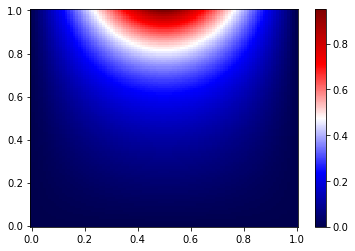

In [10]:
im = plt.pcolor(x_test, y_test, T_test, cmap='seismic', shading='auto')
plt.colorbar(im)

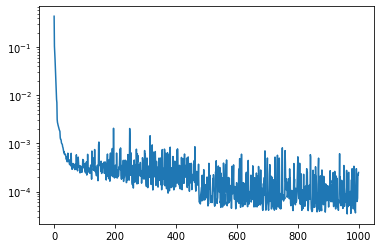

In [11]:
plt.semilogy(h.history['loss'])